

# Project: Communicate Data Findings (The loan data from prosper)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

the loan data from prosper which related the Business sectore 
so the Questions are 


Q1-What factors affect a loan’s outcome status?



Q3-What is the variables which affect prosper grade for a given borrower ?

Q4- what is the effect of the income range and the monthly income on the status of loan ?

Q5-Is there a realation between the loan amount ,Occuption and home owner ?

Q6-what is the most popular loan type  ?

Q7-Is there a realation between term prosper score?




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df=pd.read_csv('F:\Data Analysis\prosperLoanData.csv')

In [3]:
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Because there are many variables we creat the data frame  which have the interested variable we want

In [3]:
loan_data=df[['Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EstimatedEffectiveYield'
            ,'ProsperScore','ListingCategory (numeric)','Occupation','IsBorrowerHomeowner','DebtToIncomeRatio'
            ,'IncomeRange','StatedMonthlyIncome','LoanKey','LoanOriginalAmount','LoanOriginationQuarter'
            ,'Investors']].copy()

In [5]:
loan_data.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,ProsperScore,ListingCategory (numeric),Occupation,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanKey,LoanOriginalAmount,LoanOriginationQuarter,Investors
0,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,0,Other,True,0.17,"$25,000-49,999",3083.333333,E33A3400205839220442E84,9425,Q3 2007,258
1,36,Current,0.12016,0.0920,0.0820,0.07960,7.0,2,Professional,False,0.18,"$50,000-74,999",6125.000000,9E3B37071505919926B1D82,10000,Q1 2014,1
2,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,0,Other,False,0.06,Not displayed,2083.333333,6954337960046817851BCB2,3001,Q1 2007,41
3,36,Current,0.12528,0.0974,0.0874,0.08490,9.0,16,Skilled Labor,True,0.15,"$25,000-49,999",2875.000000,A0393664465886295619C51,10000,Q4 2012,158
4,36,Current,0.24614,0.2085,0.1985,0.18316,4.0,2,Executive,True,0.26,"$100,000+",9583.333333,A180369302188889200689E,15000,Q3 2013,20


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   LenderYield                113937 non-null  float64
 5   EstimatedEffectiveYield    84853 non-null   float64
 6   ProsperScore               84853 non-null   float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   Occupation                 110349 non-null  object 
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  DebtToIncomeRatio          105383 non-null  float64
 11  IncomeRange                113937 non-null  object 
 12  StatedMonthlyIncome        113937 non-null  float64
 13  LoanKey                    11

In [4]:
loan_data=loan_data.rename(columns={"ListingCategory (numeric)": "ListingCategory"})

 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [5]:
numeric_List=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
string_value=['Not Available','Debt Consolidation','Home Improvemen','Business','Personal Loan','Student Use',
             'Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans',
             'Household Expenses','Large Purchases','Medical/Denta','Motorcycle','RV','Taxes','Vacation','Wedding Loans']
loan_data['ListingCategory']=loan_data.ListingCategory.replace(numeric_List,string_value)

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Term                     113937 non-null  int64  
 1   LoanStatus               113937 non-null  object 
 2   BorrowerAPR              113912 non-null  float64
 3   BorrowerRate             113937 non-null  float64
 4   LenderYield              113937 non-null  float64
 5   EstimatedEffectiveYield  84853 non-null   float64
 6   ProsperScore             84853 non-null   float64
 7   ListingCategory          113937 non-null  object 
 8   Occupation               110349 non-null  object 
 9   IsBorrowerHomeowner      113937 non-null  bool   
 10  DebtToIncomeRatio        105383 non-null  float64
 11  IncomeRange              113937 non-null  object 
 12  StatedMonthlyIncome      113937 non-null  float64
 13  LoanKey                  113937 non-null  object 
 14  Loan

In [10]:
loan_data.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,0.168661,5.950067,0.275947,5.608026e+03,8337.01385,80.475228
std,10.436212,0.080364,0.074818,0.074516,0.068467,2.376501,0.551759,7.478497e+03,6245.80058,103.239020
min,12.000000,0.006530,0.000000,-0.010000,-0.182700,1.000000,0.000000,0.000000e+00,1000.00000,1.000000
25%,36.000000,0.156290,0.134000,0.124200,0.115670,4.000000,0.140000,3.200333e+03,4000.00000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,0.161500,6.000000,0.220000,4.666667e+03,6500.00000,44.000000
75%,36.000000,0.283810,0.250000,0.240000,0.224300,8.000000,0.320000,6.825000e+03,12000.00000,115.000000
max,60.000000,0.512290,0.497500,0.492500,0.319900,11.000000,10.010000,1.750003e+06,35000.00000,1189.000000


# check  the Null values of data and replace null with coustom value based on the column data type  


### Replace the null value with the mean in all numeric features  

In [6]:
loan_data['BorrowerAPR'].fillna((loan_data['BorrowerAPR'].mean()), inplace=True)

In [7]:
loan_data['ProsperScore'].fillna((loan_data['ProsperScore'].mean()), inplace=True)

In [8]:
loan_data['DebtToIncomeRatio'].fillna((loan_data['DebtToIncomeRatio'].mean()), inplace=True)

In [9]:
loan_data['EstimatedEffectiveYield'].fillna((loan_data['EstimatedEffectiveYield'].mean()), inplace=True)

### Replace the null value witt other in Occupation feature

In [10]:
loan_data['Occupation'].fillna('other', inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


###  Univariate of some features

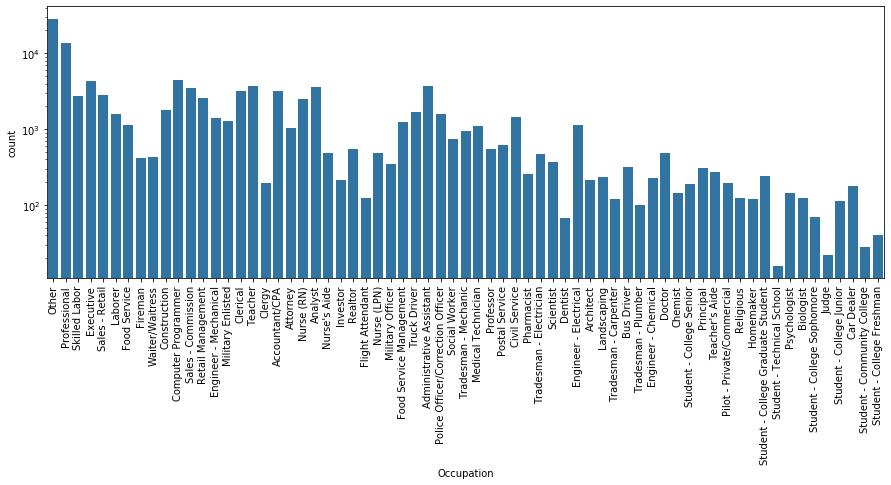

In [15]:
base_color=sb.color_palette()[0]
plt.figure(figsize=[15,5])
sb.countplot(data=loan_data,x='Occupation',color=base_color)
plt.xticks(rotation=90)
plt.yscale('log')

### from the shape the most popular Occupations are Executive ,Computer programmer and Administrative Assistant without professional and the less popular occupations is student and judge 

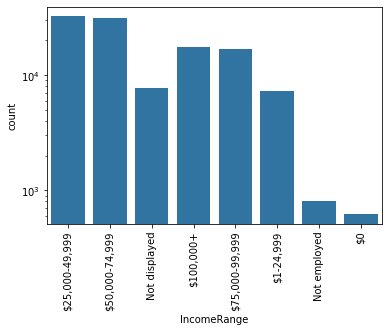

In [19]:
sb.countplot(data=loan_data,x='IncomeRange',color=base_color)
plt.xticks(rotation=90)
plt.yscale('log')

### the popular Income Ranges are 25000-49999 and 50000-74999 which indiacte the most of Bank clintes in the middle Standard of living

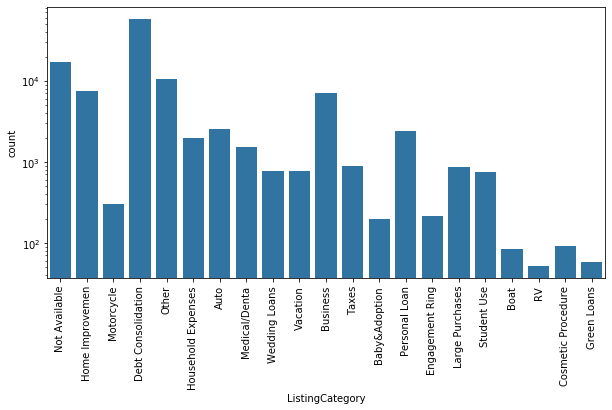

In [20]:
plt.figure(figsize=[10,5])
sb.countplot(data=loan_data,x='ListingCategory',color=base_color)
plt.xticks(rotation=90)
plt.yscale('log')

### Debt Consolidation is the most popular type of loan so  there may initially be a negative impact on the consumer's or the clinte  credit score. and  this consumer society and there the summation of the vacation,motrocycle and Auto type count assure this indiaction  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

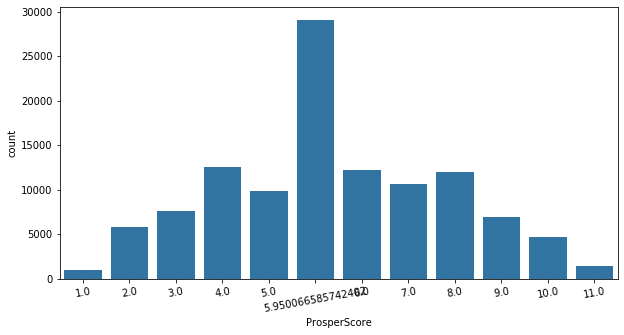

In [21]:
plt.figure(figsize=[10,5])
sb.countplot(data=loan_data,x='ProsperScore',color=base_color)
plt.xticks(rotation=10)

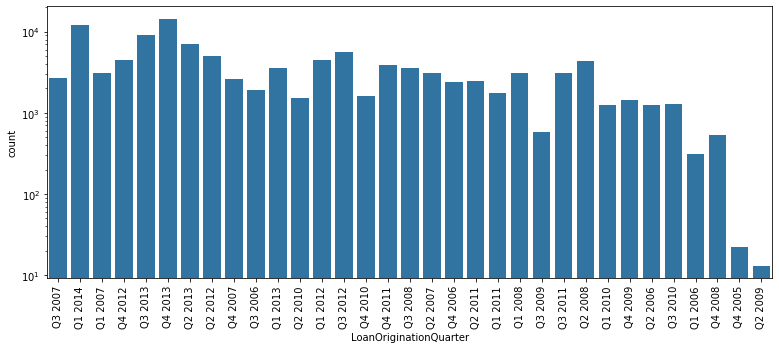

In [19]:

plt.figure(figsize=[13,5])
sb.countplot(data=loan_data,x='LoanOriginationQuarter',color=base_color)
plt.xticks(rotation=90)
plt.yscale('log')

### from this figure we can tell 2013 has the flourishment of the bank to Q1 2014 

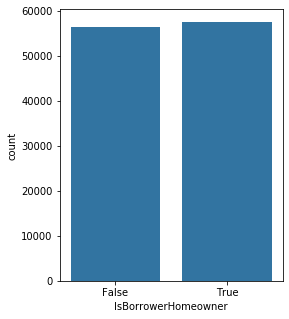

In [27]:
plt.figure(figsize=[4,5])
sb.countplot(data=loan_data,x='IsBorrowerHomeowner',color=base_color)


### this figure there is the probelm in the houseing 

Text(0, 0.5, 'the count')

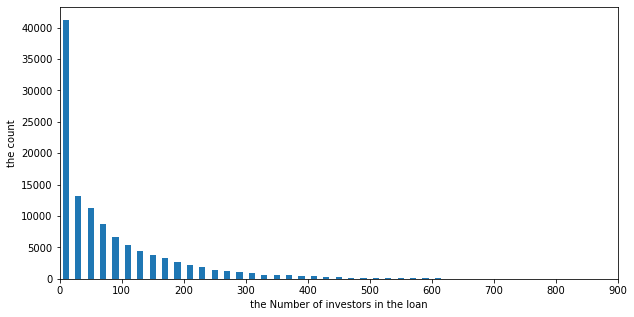

In [25]:
Bin=np.arange(0,loan_data['Investors'].max()+1,20)
plt.figure(figsize=[10,5])
plt.hist(data=loan_data,x='Investors',bins=Bin,rwidth=.5,color=base_color)
#plt.yscale('log')
plt.xlim(0,900)
plt.xlabel(' the Number of investors in the loan ')
plt.ylabel('the count')

### Here the number of the investors of the more half total number of loan in the range 1-40 and indicate it is the approperiate range  

Text(0, 0.5, 'the count')

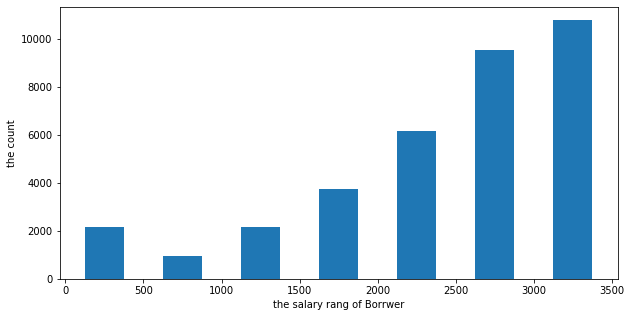

In [44]:

Bin=np.arange(0,4000,500)
plt.figure(figsize=[10,5])
plt.hist(data=loan_data,x='StatedMonthlyIncome',bins=Bin,rwidth=.5,color=base_color)
plt.xlabel('the salary rang of Borrwer')
plt.ylabel('the count')

### the salary figure assure our induction from the income most of Bank clintes in the middle Standard of living

#  Bivariate of some features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

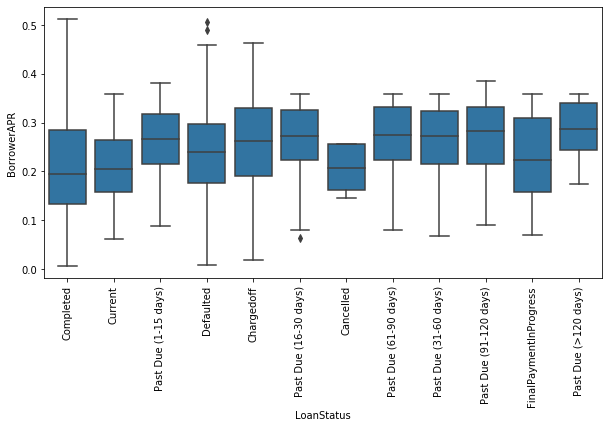

In [27]:
plt.figure(figsize=[10,5])
sb.boxplot(data = loan_data, x = 'LoanStatus', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation=90)

### this figure show there is a strong relation between the Anual Percentage Rate and status of the loan when the APR is low the loan complete and when the APR heigh the loan un completed 

In [11]:
Status_Occupation_counts = loan_data.groupby(['LoanStatus', 'Occupation']).size()
Status_Occupation_counts = Status_Occupation_counts.reset_index()
Status_Occupation_counts = Status_Occupation_counts.pivot(index = 'Occupation', columns = 'LoanStatus')

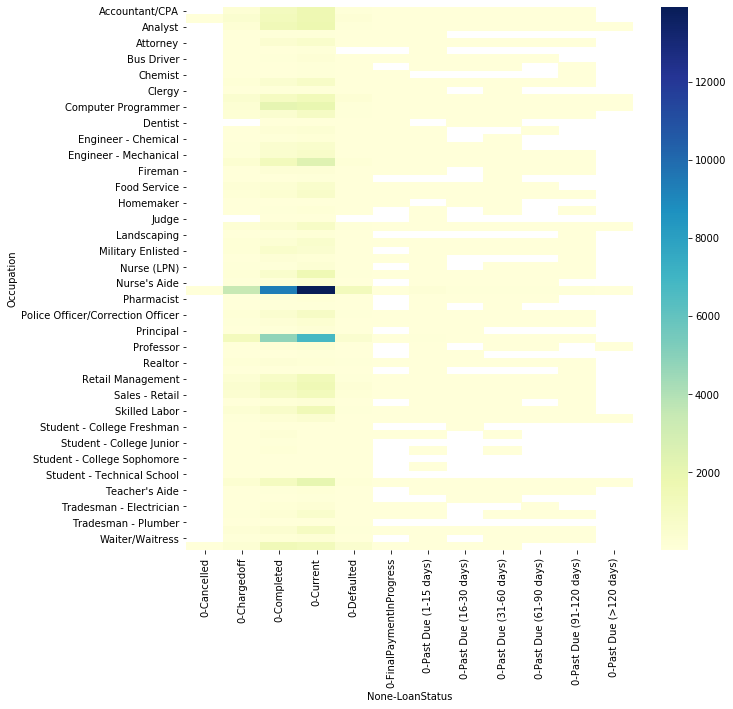

In [12]:
plt.figure(figsize=[10,10])
sb.heatmap(Status_Occupation_counts,cmap="YlGnBu")


### the most frequency occupations with the complete stauts is which have the heigh Income Range 

In [14]:

Income_Occupation_counts = loan_data.groupby(['IncomeRange', 'Occupation']).size()

Income_Occupation_counts = Income_Occupation_counts.reset_index()

Income_Occupation_counts = Income_Occupation_counts.pivot(index ='Occupation', columns = 'IncomeRange')


Text(0.5, 69.0, 'the Income Range')

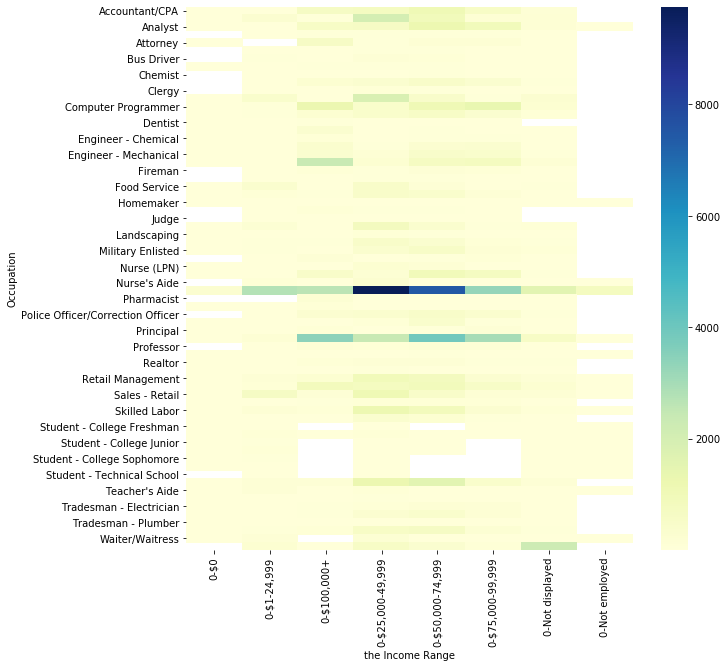

In [15]:
plt.figure(figsize=[10,10])
sb.heatmap(Income_Occupation_counts,cmap="YlGnBu")
plt.xlabel('the Income Range')


### this figure assure the previous heat Map the hiegh range income related the job which complete the Loan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 <a list of 68 Text xticklabel objects>)

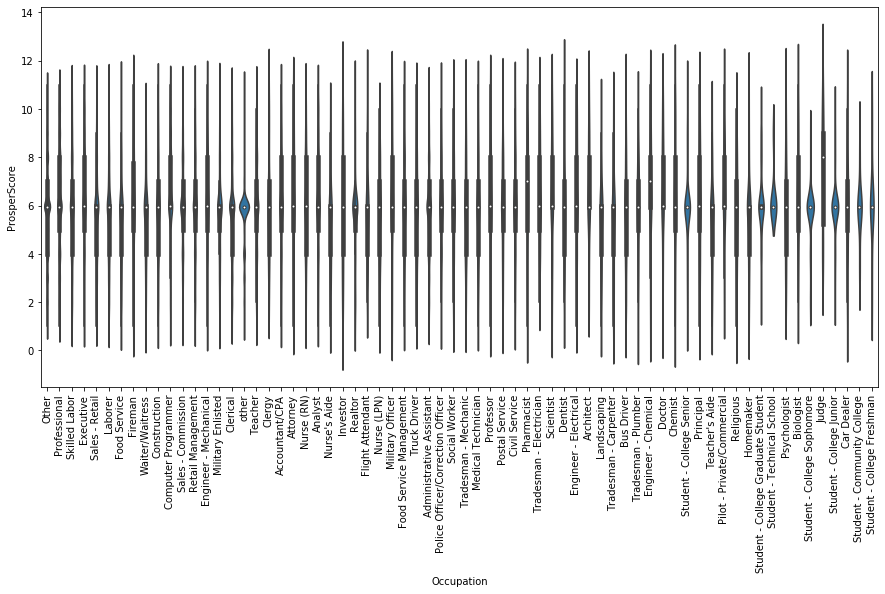

In [33]:
plt.figure(figsize=[15,7])
sb.violinplot(data = loan_data, x = 'Occupation', y = 'ProsperScore', color = base_color)
plt.xticks(rotation=90)

### the relation between Occupation and  prosper score in this figure the mediean of  prosper score for the occupation is 6 excpet judge and pharmacist these jobs has high income and their loans completed  

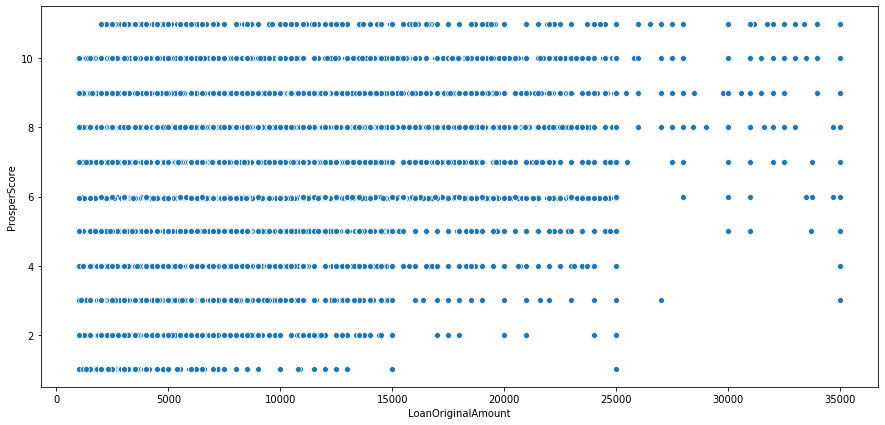

In [40]:
plt.figure(figsize=[15,7])
sb.scatterplot(data = loan_data, x = 'LoanOriginalAmount', y = 'ProsperScore', color = base_color)


### the large loan has high score and the count of it is small as in the figure 

#  Multivariate of some features
what is the effect of the income range and the monthly income on the status of loan

C:\Users\Ahmed Adel\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ahmed Adel\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


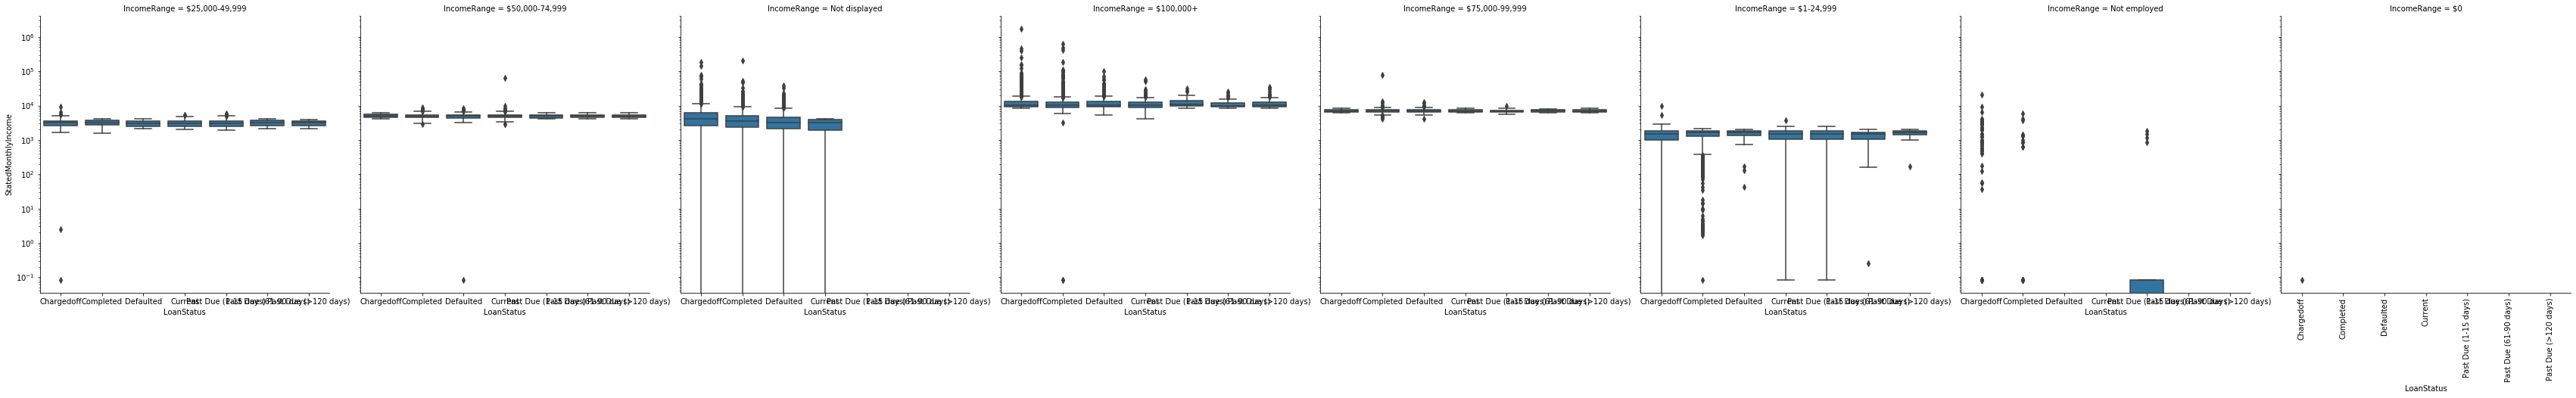

In [46]:
g = sb.FacetGrid(data = loan_data, col = 'IncomeRange', size = 6)
g.map(sb.boxplot, 'LoanStatus', 'StatedMonthlyIncome')
plt.xticks(rotation=90)
plt.yscale('log')

Q5-Is there a realation between the loan amount ,Occuption and home owner ?

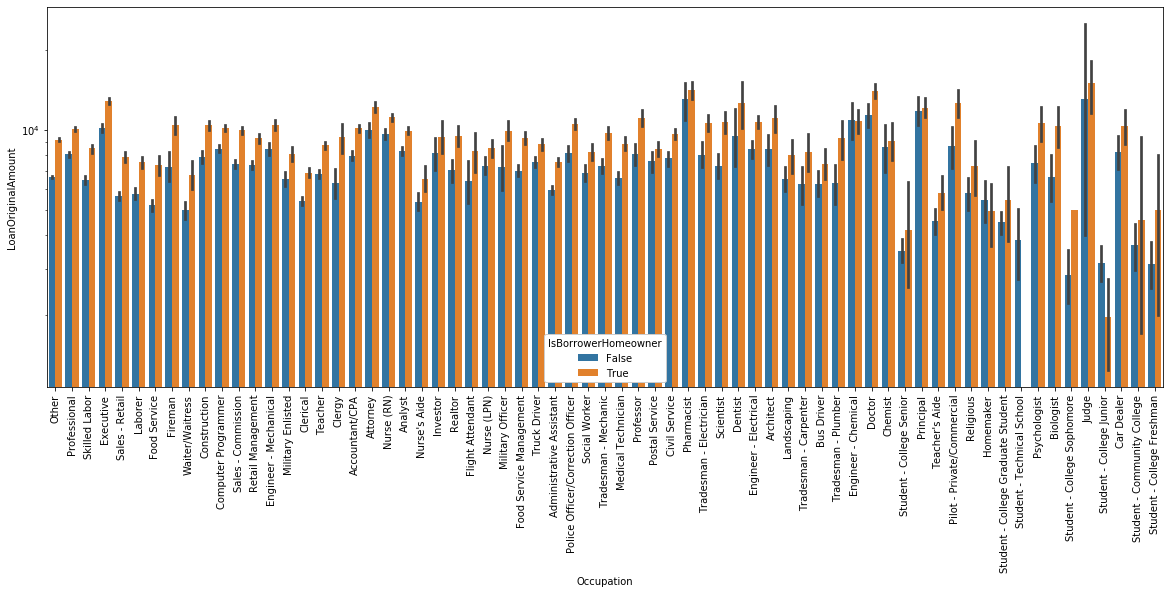

In [52]:
plt.figure(figsize=[20,7])
ax = sb.barplot(data = df, x = 'Occupation', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner')
ax.legend(loc = 8,  framealpha = 1, title = 'IsBorrowerHomeowner')
plt.xticks(rotation=90)
plt.yscale('log')

### from this figure the people in the same occuption who own the house have bigger loan than who don't own  

<a id='conclusions'></a>
# Conclusions

## form the all Previous  figures we conclude some point 


### 1- the occupation , incomeRange and Borrwer APR effect on the Loan status 

### 2- the relation  Prosper score with income , and  Prosper score with occupation and loan amount so the Prosper score  depend on the incom ,loan amount and the occuption 

### 3- the status loan depend on the salary 

### 4- the people who own home have large salary and loan amount